# Klassifikation der Bezierke nach Meeresnähe

Die Fragestellung, das Problem:

**Wir wollen in Zukunft die Nähe den Median der Häuserwerte bestimmen. Dazu wollen wir ein Regressionsmodel trainieren, welches den Median vorhersagt.**

In diesem Beispiel verwenden wir dazu KNN-Regressor

## K-Neightbors-Regression

In [1]:
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns 
sns.set()

### Einlesen und Visualisierung der Daten

In [2]:
data = pd.read_csv("../data/housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


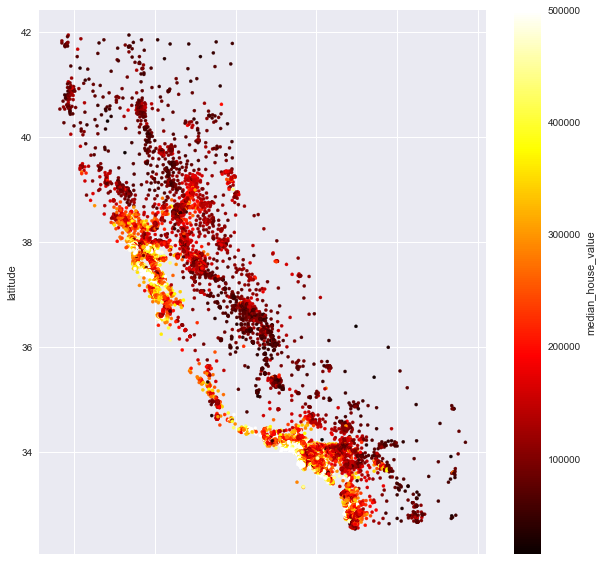

In [3]:
data.plot.scatter(x='longitude', y='latitude', c='median_house_value', s=10, cmap='hot', figsize=(10,10));

### Teile den Datensatz in Train und Test

In [4]:
cleaned_data = data.dropna()

#### One-Hot Encoding der Kategorischen Feature

Der Einfachheit halber machen wir das One-Hot-Encoding bevor wir den Datensatz teilen. Dazu benutzen wir get_dummies(), das Ergebnis der Funktion hängen wir an cleaned_data mit dem Befehl concat. Aus dem Zusammengesetzten DataFramen entfernen wir die ursprüngliche Spalte ocean_proximity. 

In [5]:
cleaned_data = pd.concat([cleaned_data, pd.get_dummies(cleaned_data['ocean_proximity'])], sort=True, axis=1).drop('ocean_proximity', axis=1)

Dann Teilen wir den Datensatz

In [6]:
X = cleaned_data.drop('median_house_value', axis=1)
y = cleaned_data['median_house_value'].values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [8]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
13366,-117.63,33.94,36.0,447.0,95.0,2886.0,85.0,4.2578,0,1,0,0,0
20114,-120.47,37.96,25.0,2505.0,529.0,1145.0,483.0,2.0060,0,1,0,0,0
7409,-118.22,33.96,42.0,1380.0,331.0,1290.0,288.0,2.8000,1,0,0,0,0
4652,-118.32,34.06,36.0,3239.0,722.0,1383.0,612.0,4.5918,1,0,0,0,0
18252,-122.10,37.39,36.0,1860.0,367.0,794.0,366.0,5.0871,0,0,0,1,0


### Vorverarbeitung der Datansätze

Die Zielvariable y müssen wir nicht unbedingt skalieren.

#### Skalierung der Feature

In [9]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

Wir fitten den Scaler nur mit den Trainingsdaten

In [10]:
min_max_scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

Und wenden ihn dann auf Train und Test an:

In [11]:
X_train = min_max_scaler.transform(X_train)
X_test = min_max_scaler.transform(X_test)

### Baue den Regressor

In [12]:
from sklearn.neighbors import KNeighborsRegressor

In [13]:
k = 5
knn = KNeighborsRegressor(k)

#### Training

In [14]:
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

Nun haben wir unser Modell und wollen es testen

### Verwende den Klassifier und werte ihn aus

In [15]:
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

---

#### Auswertung

Es gibt verschiedene Fehlermaße, eines ist z. B. der mittlere absolute Fehler (https://de.wikipedia.org/wiki/Mittlerer_absoluter_Fehler).

**Fehler**

In [16]:
# Trainingsdatensatz
error_train = (y_train - y_pred_train).mean()
error_train

2655.844937910883

In [18]:
# Testdatensatz
error_test =  (y_test - y_pred_test).mean()
error_test

3852.0115675515344

**Der Fehler gibt an, wieiel wir im Mittel von dem tatsächlichen Median abweichen** 

### Fehler für verschiedene K

In [21]:
train_errors = []
test_errors = []

for k in range(1,50):
    knn_iterated = KNeighborsRegressor(k)
    # Training
    knn_iterated.fit(X_train, y_train)
    
    # Predict
    y_k_predict = knn_iterated.predict(X_train)
    train_errors.append((1.0 * (y_train - y_k_predict)).mean())

    y_k_predict = knn_iterated.predict(X_test)
    test_errors.append((1.0 * (y_test - y_k_predict)).mean())


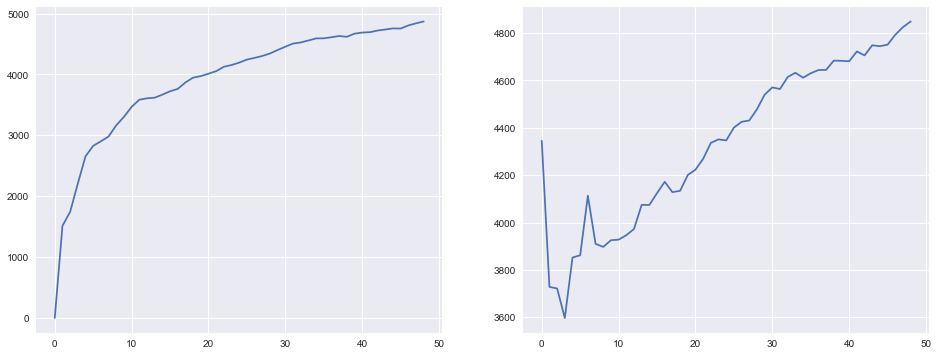

In [22]:
plt.figure(1, figsize=(16, 6))
plt.subplot(1,2,1)
plt.plot(train_errors)
plt.subplot(1,2,2)
plt.plot(test_errors);

---

**Aufgaben**
- Wir können ein geeignetes K mittels des mittleren absoluten Fehlers bestimmen. Dies wird oben gemacht, allerdings mit den Testdaten. Teile die Daten in Train, Validate und Test und bestimme mittels des Validate Datensatzes ein geeignetes K. Wie unterscheidet sich der Validate-Fehler vom Test-Fehler für dieses K?
- Bekomme ich ein anderes optimales K, wenn ich einen anderes Fehlermaß verwende (z. B. den mittleren quadratischen Fehler)?
- Kann ich durch weglassen von Featuren vielleicht meine Vorhersage verbessern?
- Kann ich durch eine andere Skalierung der Feature meine Vorhersage verbessern?